In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/flood_drought/final.csv')
df

,AvgTemp,mon,YEAR,DISTRICT,STATE,PotentialEvapTran,Precipitation,SPI,VapourPres,WetDayFreq,CLASS
0,22.669,Jan,1952,ANATAPUR,ANDHRA PRADESH,6.09,0.000,-1.35,15.098,0.000,0
1,25.081,Feb,1952,ANATAPUR,ANDHRA PRADESH,6.84,2.096,-1.12,15.195,0.681,0
2,27.498,Mar,1952,ANATAPUR,ANDHRA PRADESH,7.62,1.482,-0.27,15.542,0.754,0
3,30.161,Apr,1952,ANATAPUR,ANDHRA PRADESH,7.97,5.901,0.18,19.614,1.201,0
4,29.437,May,1952,ANATAPUR,ANDHRA PRADESH,7.85,131.744,-0.28,21.053,5.813,0
...,...,...,...,...,...,...,...,...,...,...,...
29983,24.965,Aug,2002,PARBHANI,MAHARASHTRA,5.42,206.450,-0.28,24.204,9.360,0
29984,25.917,Sep,2002,PARBHANI,MAHARASHTRA,6.11,134.435,-0.54,23.960,6.664,0
29985,26.912,Oct,2002,PARBHANI,MAHARASHTRA,6.62,55.296,-0.65,16.737,2.700,0
29986,23.664,Nov,2002,PARBHANI,MAHARASHTRA,6.26,3.397,-0.74,13.114,1.072,0


In [ ]:
for idx,row in df.iterrows():
    if row['DISTRICT']=='AURANGABAD' and row['STATE']=='BIHAR':
        df.loc[idx,'DISTRICT'] = 'AURANGABAD1'
    elif row['DISTRICT']=='AURANGABAD' and row['STATE']=='MAHARASHTRA':
        df.loc[idx,'DISTRICT'] = 'AURANGABAD2'
df['DISTRICT'].value_counts()

,count
DISTRICT,
ANATAPUR,612
PATAN,612
RAJKOT,612
SURENDRANAGAR,612
BAGALKOT,612
BELLARY,612
BIDAR,612
DHARWAD,612
GADAG,612


In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
df['DISTRICT'] = le1.fit_transform(df['DISTRICT'])
df['STATE'] = le2.fit_transform(df['STATE'])

In [ ]:
dists = df['DISTRICT'].unique()
print("No. of Districts =",len(dists))

No. of Districts = 49


In [ ]:
df['mon'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['mon'] = df['mon'].map(month_order)

In [ ]:
df['mon-sin'] = np.sin(2*np.pi*df['mon']/12)
df['mon-cos'] = np.cos(2*np.pi*df['mon']/12)
df.drop(['mon'],axis=1,inplace=True)

In [ ]:
df.head()

,AvgTemp,YEAR,DISTRICT,STATE,PotentialEvapTran,Precipitation,SPI,VapourPres,WetDayFreq,CLASS,mon-sin,mon-cos
0,22.669,1952,3,0,6.09,0.000,-1.35,15.098,0.000,0,0.500000,8.660254e-01
1,25.081,1952,3,0,6.84,2.096,-1.12,15.195,0.681,0,0.866025,5.000000e-01
2,27.498,1952,3,0,7.62,1.482,-0.27,15.542,0.754,0,1.000000,6.123234e-17
3,30.161,1952,3,0,7.97,5.901,0.18,19.614,1.201,0,0.866025,-5.000000e-01
4,29.437,1952,3,0,7.85,131.744,-0.28,21.053,5.813,0,0.500000,-8.660254e-01


In [ ]:
def create_sequences(df,y,ts):
    seqs,labs = [],[]
    for i in range(len(df)-ts):
        seqs.append(df[i:i+ts])
        labs.append(y[i+ts])
    return np.array(seqs),np.array(labs)
X,y = df.drop(['CLASS'],axis=1), df['CLASS']
X,y = create_sequences(X,y,6)

In [ ]:
from sklearn.preprocessing import StandardScaler
ts = int(0.8*len(X))
trainX, testX = X[:ts], X[ts:]
trainY, testY = y[:ts], y[ts:]
samples, timesteps, features = trainX.shape
trainX_reshaped = trainX.reshape(samples * timesteps, features)
scaler = StandardScaler()
trainX_scaled_reshaped = scaler.fit_transform(trainX_reshaped)
trainX = trainX_scaled_reshaped.reshape(samples, timesteps, features)

testX_reshaped = testX.reshape(testX.shape[0] * testX.shape[1], testX.shape[2])
testX_scaled_reshaped = scaler.transform(testX_reshaped)
testX = testX_scaled_reshaped.reshape(testX.shape[0], testX.shape[1], testX.shape[2])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(LSTM(50,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 6, 50)               │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 6, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 6, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,329 (141.91 KB)

 Trainable params: 36,129 (141.13 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
cbs = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10),
       tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/flood_drought/lstm.keras',monitor='val_accuracy',
                                          save_best_only=True,verbose=1)]
hist = model.fit(trainX,trainY,epochs=50,batch_size=32,validation_split=0.2,callbacks=cbs)

Epoch 1/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9093 - loss: 0.2595
Epoch 1: val_accuracy improved from -inf to 0.92683, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9094 - loss: 0.2593 - val_accuracy: 0.9268 - val_loss: 0.2397
Epoch 2/50
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9398 - loss: 0.1813
Epoch 2: val_accuracy improved from 0.92683 to 0.93433, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9398 - loss: 0.1813 - val_accuracy: 0.9343 - val_loss: 0.2167
Epoch 3/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9429 - loss: 0.1630
Epoch 3: val_accuracy did not improve from 0.93433
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9429 - loss: 0.1630 - val_accuracy: 0.9306 - val_loss: 0.2328
Epoch 4/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9455 - loss: 0.1583
Epoch 4

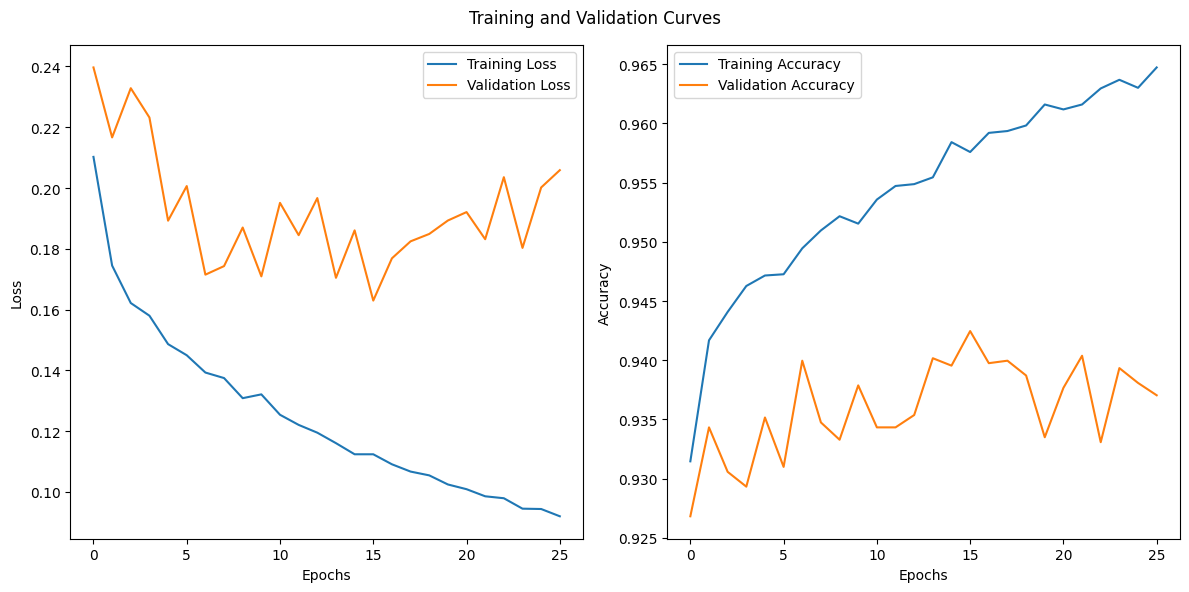

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.suptitle('Training and Validation Curves')

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


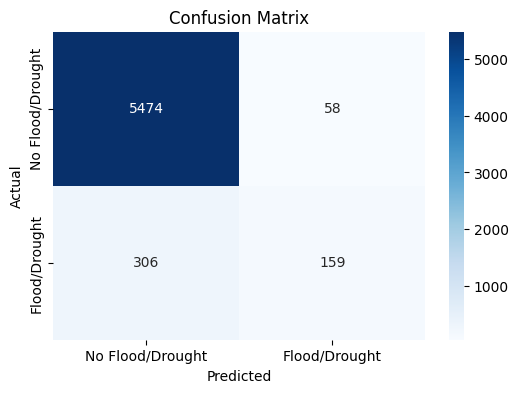

Accuracy: 0.9393029848257463
Macro Precision: 0.8398888587693142
Macro Recall: 0.665725514892823
Macro F1-Score: 0.7170487210011324

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5532
           1       0.73      0.34      0.47       465

    accuracy                           0.94      5997
   macro avg       0.84      0.67      0.72      5997
weighted avg       0.93      0.94      0.93      5997



In [ ]:
# prompt: evaluate model on test set, plot confusion matrix, print accuracy, macro precision recall, f1, classification report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
import seaborn as sns

# Evaluate the model on the test set
y_pred = (model.predict(testX) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(testY, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood/Drought', 'Flood/Drought'], yticklabels=['No Flood/Drought', 'Flood/Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(testY, y_pred)
print("Accuracy:", accuracy)

# Macro precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred, average='macro')
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1-Score:", f1_score)

# Classification report
print("\nClassification Report:\n", classification_report(testY, y_pred))


In [ ]:
from sklearn.metrics import precision_recall_curve
y_pred_prob = model.predict(testX)

# Find the optimal threshold for recall
precisions, recalls, thresholds = precision_recall_curve(testY, y_pred_prob)

# Choose threshold that maximizes recall (or balances precision/recall)
optimal_threshold = thresholds[np.argmax(recalls)]
print(optimal_threshold)
# Apply threshold
y_pred_adjusted = (y_pred_prob >= optimal_threshold).astype(int)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.45836285


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(LSTM(50,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
def weighted_binary_crossentropy(y_true, y_pred):
    weight_for_class_0 = 0.2  # Class 0 weight
    weight_for_class_1 = 0.8  # Class 1 weight (higher since it has fewer samples)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weight_vector = y_true * weight_for_class_1 + (1 - y_true) * weight_for_class_0
    return weight_vector * bce
model.compile(optimizer='adam',loss=weighted_binary_crossentropy, metrics=['accuracy', tf.keras.metrics.Recall()])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 6, 50)               │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 6, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 6, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_49 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,329 (141.91 KB)

 Trainable params: 36,129 (141.13 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(trainY), y=trainY)
cbs = [tf.keras.callbacks.EarlyStopping(monitor='val_recall_5',patience=10,mode='max'),
       tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/flood_drought/lstm.keras',monitor='val_recall_5',
                                          save_best_only=True,verbose=1,mode='max')]
hist = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.2,
                 callbacks=cbs, class_weight={0: class_weights[0], 1: class_weights[1]})

Epoch 1/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7050 - loss: 0.1396 - recall_5: 0.6813
Epoch 1: val_recall_5 improved from -inf to 0.66489, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7051 - loss: 0.1395 - recall_5: 0.6817 - val_accuracy: 0.8424 - val_loss: 0.0942 - val_recall_5: 0.6649
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7553 - loss: 0.1108 - recall_5: 0.7984
Epoch 2: val_recall_5 improved from 0.66489 to 0.67021, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7553 - loss: 0.1108 - recall_5: 0.7985 - val_accuracy: 0.8555 - val_loss: 0.0880 - val_recall_5: 0.6702
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7753 - loss: 0.1012 - recall_5: 0.8287
Epoch 3: val_recall_5 did not improve from 0.67021
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7753 - loss: 0.1

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


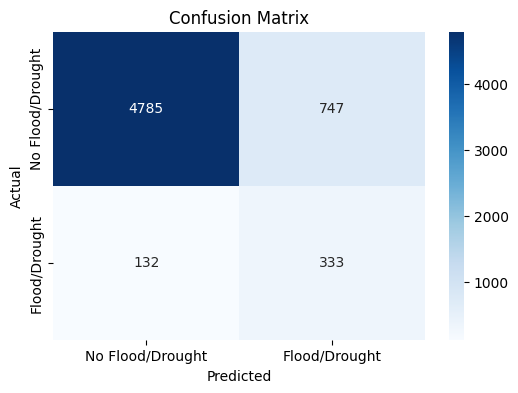

Accuracy: 0.8534267133566783
Macro Precision: 0.6407438478747204
Macro Recall: 0.790548247148555
Macro F1-Score: 0.6734725392962768

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.92      5532
           1       0.31      0.72      0.43       465

    accuracy                           0.85      5997
   macro avg       0.64      0.79      0.67      5997
weighted avg       0.92      0.85      0.88      5997



In [ ]:

y_pred = (model.predict(testX) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(testY, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood/Drought', 'Flood/Drought'], yticklabels=['No Flood/Drought', 'Flood/Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(testY, y_pred)
print("Accuracy:", accuracy)

# Macro precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred, average='macro')
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1-Score:", f1_score)

# Classification report
print("\nClassification Report:\n", classification_report(testY, y_pred))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(LSTM(50,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, 6, 50)               │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 6, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 6, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_55 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,329 (141.91 KB)

 Trainable params: 36,129 (141.13 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
cbs = [tf.keras.callbacks.EarlyStopping(monitor='val_recall_8',patience=10,mode='max'),
       tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/flood_drought/lstm.keras',monitor='val_recall_8',
                                          save_best_only=True,verbose=1,mode='max')]
hist = model.fit(trainX,trainY,epochs=50,batch_size=60,validation_split=0.2,callbacks=cbs)

Epoch 1/50
319/320 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9084 - loss: 0.2639 - recall_8: 0.1384
Epoch 1: val_recall_8 improved from -inf to 0.00000, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9085 - loss: 0.2636 - recall_8: 0.1386 - val_accuracy: 0.9216 - val_loss: 0.2319 - val_recall_8: 0.0000e+00
Epoch 2/50
316/320 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9419 - loss: 0.1703 - recall_8: 0.2086
Epoch 2: val_recall_8 improved from 0.00000 to 0.05319, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9419 - loss: 0.1703 - recall_8: 0.2091 - val_accuracy: 0.9256 - val_loss: 0.2418 - val_recall_8: 0.0532
Epoch 3/50
318/320 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9443 - loss: 0.1651 - recall_8: 0.2709
Epoch 3: val_recall_8 improved from 0.05319 to 0.09840, saving model to /content/drive/MyDrive/flood_drought/lstm.keras


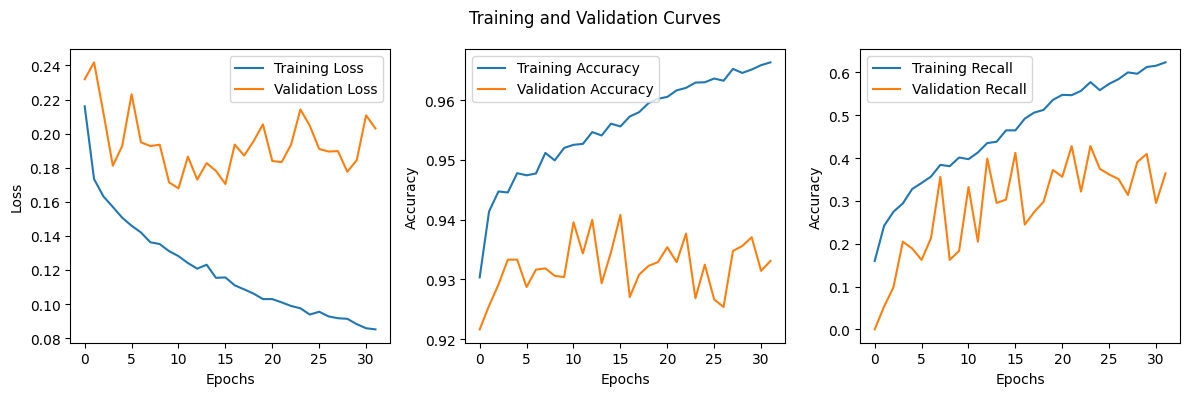

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.suptitle('Training and Validation Curves')

plt.subplot(1, 3, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(hist.history['recall_8'], label='Training Recall')
plt.plot(hist.history['val_recall_8'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


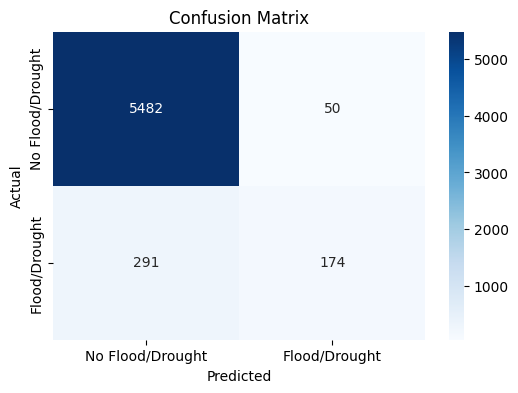

Accuracy: 0.9431382357845589
Macro Precision: 0.8631893234515355
Macro Recall: 0.6825776129498752
Macro F1-Score: 0.7374580907147061

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5532
           1       0.78      0.37      0.51       465

    accuracy                           0.94      5997
   macro avg       0.86      0.68      0.74      5997
weighted avg       0.94      0.94      0.93      5997



In [ ]:

y_pred = (model.predict(testX) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(testY, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood/Drought', 'Flood/Drought'], yticklabels=['No Flood/Drought', 'Flood/Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(testY, y_pred)
print("Accuracy:", accuracy)

# Macro precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred, average='macro')
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1-Score:", f1_score)

# Classification report
print("\nClassification Report:\n", classification_report(testY, y_pred))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(LSTM(50,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
def weighted_binary_crossentropy(y_true, y_pred):
    weight_for_class_0 = 0.2  # Class 0 weight
    weight_for_class_1 = 0.8  # Class 1 weight (higher since it has fewer samples)

    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weight_vector = y_true * weight_for_class_1 + (1 - y_true) * weight_for_class_0

    return weight_vector * bce
model.compile(optimizer='adam',loss=weighted_binary_crossentropy, metrics=['accuracy', tf.keras.metrics.Recall()])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 6, 50)               │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 6, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 6, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_57 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,329 (141.91 KB)

 Trainable params: 36,129 (141.13 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
cbs = [tf.keras.callbacks.EarlyStopping(monitor='val_recall_9',patience=10,mode='max'),
       tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/flood_drought/lstm.keras',monitor='val_recall_9',
                                          save_best_only=True,verbose=1,mode='max')]
hist = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.2,
                 callbacks=cbs)

Epoch 1/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8951 - loss: 0.0680 - recall_9: 0.1592
Epoch 1: val_recall_9 improved from -inf to 0.11968, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8952 - loss: 0.0679 - recall_9: 0.1593 - val_accuracy: 0.9289 - val_loss: 0.0718 - val_recall_9: 0.1197
Epoch 2/50
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9420 - loss: 0.0433 - recall_9: 0.2650
Epoch 2: val_recall_9 improved from 0.11968 to 0.16223, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9420 - loss: 0.0433 - recall_9: 0.2651 - val_accuracy: 0.9312 - val_loss: 0.0670 - val_recall_9: 0.1622
Epoch 3/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9447 - loss: 0.0411 - recall_9: 0.3364
Epoch 3: val_recall_9 did not improve from 0.16223
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9447 - loss: 0.04

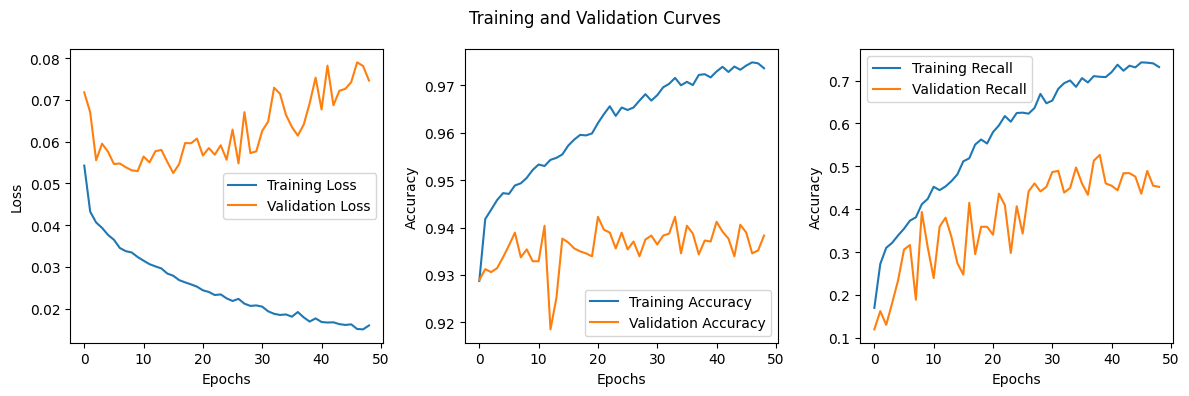

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.suptitle('Training and Validation Curves')

plt.subplot(1, 3, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(hist.history['recall_9'], label='Training Recall')
plt.plot(hist.history['val_recall_9'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


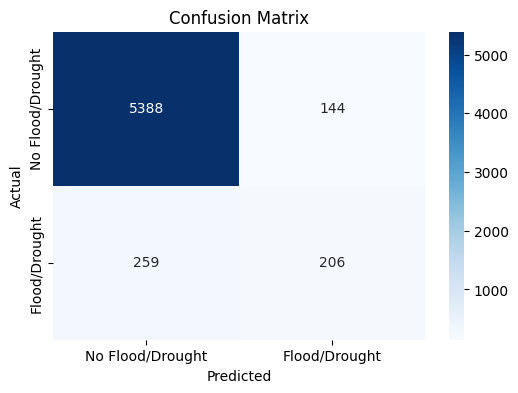

Accuracy: 0.9327997331999333
Macro Precision: 0.771353183738521
Macro Recall: 0.7084901919623072
Macro F1-Score: 0.7347358681401422

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      5532
           1       0.59      0.44      0.51       465

    accuracy                           0.93      5997
   macro avg       0.77      0.71      0.73      5997
weighted avg       0.93      0.93      0.93      5997



In [ ]:

y_pred = (model.predict(testX) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(testY, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood/Drought', 'Flood/Drought'], yticklabels=['No Flood/Drought', 'Flood/Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(testY, y_pred)
print("Accuracy:", accuracy)

# Macro precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred, average='macro')
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1-Score:", f1_score)

# Classification report
print("\nClassification Report:\n", classification_report(testY, y_pred))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(LSTM(50,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                       │ (None, 6, 50)               │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 6, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 6, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_59 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,329 (141.91 KB)

 Trainable params: 36,129 (141.13 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(trainY), y=trainY)
cbs = [tf.keras.callbacks.EarlyStopping(monitor='val_recall_10',patience=10,mode='max'),
       tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/flood_drought/lstm.keras',monitor='val_recall_10',
                                          save_best_only=True,verbose=1,mode='max')]
hist = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.2,
                 callbacks=cbs, class_weight={0: class_weights[0], 1: class_weights[1]})

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6435 - loss: 0.5886 - recall_10: 0.6931
Epoch 1: val_recall_10 improved from -inf to 0.55053, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.6436 - loss: 0.5885 - recall_10: 0.6932 - val_accuracy: 0.8501 - val_loss: 0.3258 - val_recall_10: 0.5505
Epoch 2/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7683 - loss: 0.4332 - recall_10: 0.8004
Epoch 2: val_recall_10 improved from 0.55053 to 0.64362, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7683 - loss: 0.4331 - recall_10: 0.8003 - val_accuracy: 0.8155 - val_loss: 0.3655 - val_recall_10: 0.6436
Epoch 3/50
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7864 - loss: 0.4115 - recall_10: 0.8156
Epoch 3: val_recall_10 did not improve from 0.64362
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7864 

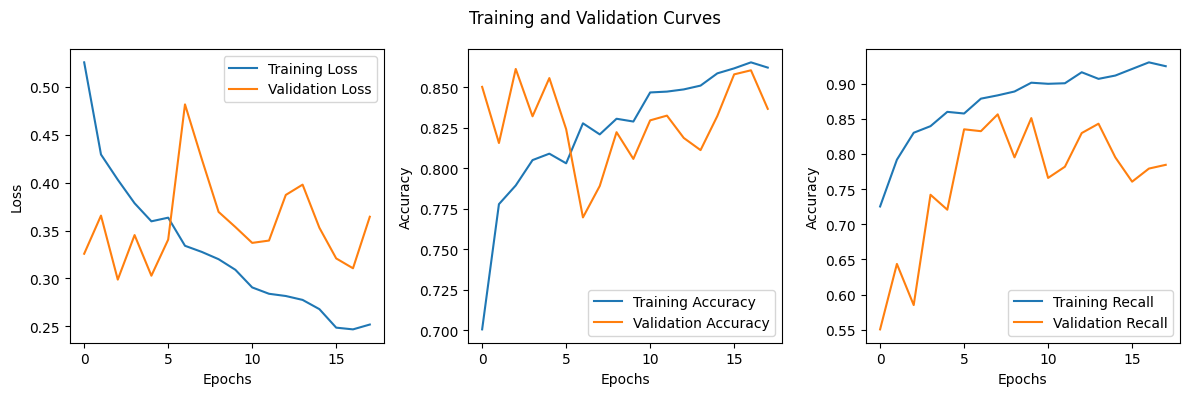

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.suptitle('Training and Validation Curves')

plt.subplot(1, 3, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(hist.history['recall_10'], label='Training Recall')
plt.plot(hist.history['val_recall_10'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


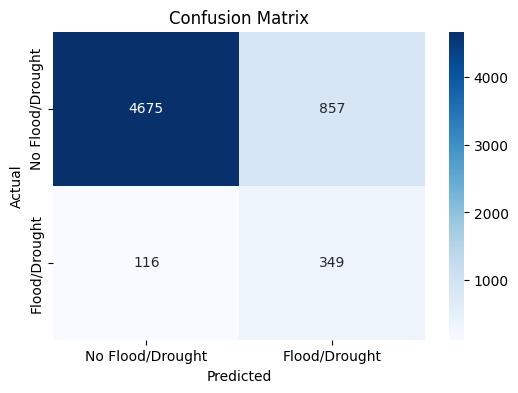

Accuracy: 0.8377522094380524
Macro Precision: 0.6325871685197474
Macro Recall: 0.7978103934877429
Macro F1-Score: 0.6617291989389054

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      5532
           1       0.29      0.75      0.42       465

    accuracy                           0.84      5997
   macro avg       0.63      0.80      0.66      5997
weighted avg       0.92      0.84      0.87      5997



In [ ]:

y_pred = (model.predict(testX) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(testY, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood/Drought', 'Flood/Drought'], yticklabels=['No Flood/Drought', 'Flood/Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(testY, y_pred)
print("Accuracy:", accuracy)

# Macro precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred, average='macro')
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1-Score:", f1_score)

# Classification report
print("\nClassification Report:\n", classification_report(testY, y_pred))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(LSTM(50,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(60,return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.005),loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                       │ (None, 6, 60)               │          17,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 6, 60)               │             240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 6, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_65 (LSTM)                       │ (None, 60)                  │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 60)                  │             240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 100)                 │           6,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,001 (207.04 KB)

 Trainable params: 52,761 (206.10 KB)

 Non-trainable params: 240 (960.00 B)

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(trainY), y=trainY)
cbs = [tf.keras.callbacks.EarlyStopping(monitor='val_recall_13',patience=10,mode='max'),
       tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/flood_drought/lstm.keras',monitor='val_recall_13',
                                          save_best_only=True,verbose=1,mode='max')]
hist = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.2,
                 callbacks=cbs, class_weight={0: class_weights[0], 1: class_weights[1]})

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7091 - loss: 0.5549 - recall_13: 0.7083
Epoch 1: val_recall_13 improved from -inf to 0.79255, saving model to /content/drive/MyDrive/flood_drought/lstm.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.7092 - loss: 0.5548 - recall_13: 0.7084 - val_accuracy: 0.6200 - val_loss: 0.6708 - val_recall_13: 0.7926
Epoch 2/50
597/600 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7795 - loss: 0.4221 - recall_13: 0.8298
Epoch 2: val_recall_13 did not improve from 0.79255
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7796 - loss: 0.4220 - recall_13: 0.8298 - val_accuracy: 0.8841 - val_loss: 0.2668 - val_recall_13: 0.5904
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7918 - loss: 0.4027 - recall_13: 0.8165
Epoch 3: val_recall_13 did not improve from 0.79255
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7918 - loss: 0.4027 - recall_13: 0.8165 - val_accuracy: 0.8881 - val_loss: 0

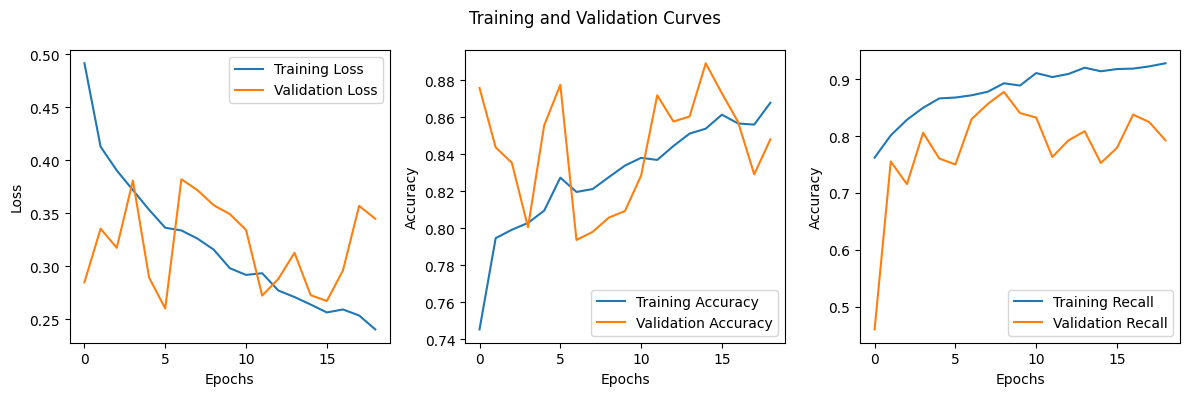

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.suptitle('Training and Validation Curves')

plt.subplot(1, 3, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(hist.history['recall_11'], label='Training Recall')
plt.plot(hist.history['val_recall_11'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


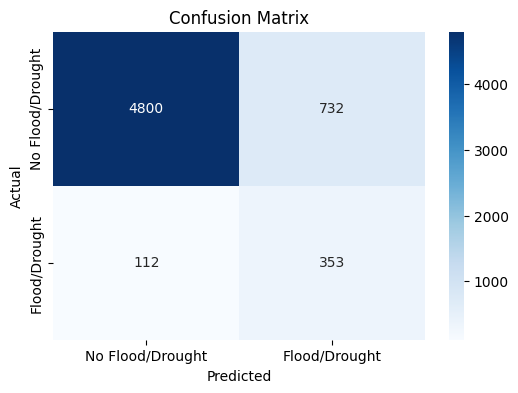

Accuracy: 0.8592629648157412
Macro Precision: 0.6512721595941098
Macro Recall: 0.813409371865743
Macro F1-Score: 0.6873359607615424

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      5532
           1       0.33      0.76      0.46       465

    accuracy                           0.86      5997
   macro avg       0.65      0.81      0.69      5997
weighted avg       0.93      0.86      0.88      5997



In [ ]:
y_pred = (model.predict(testX) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(testY, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood/Drought', 'Flood/Drought'], yticklabels=['No Flood/Drought', 'Flood/Drought'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(testY, y_pred)
print("Accuracy:", accuracy)

# Macro precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred, average='macro')
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1-Score:", f1_score)

# Classification report
print("\nClassification Report:\n", classification_report(testY, y_pred))